<a href="https://colab.research.google.com/github/yutan0565/Wake-up-Word_tensorflow2/blob/main/%EC%88%98%EC%A0%95%EC%82%AC%ED%95%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 함수 정의 모음

In [139]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal.spectral import spectrogram
import librosa.display

In [140]:
n_fft=1024
hop_length=512
win_length=1024
sample_rate = 32000
sample_time = 1

n_mels=256

n_mfcc=13

cut  = sample_rate*sample_time
click = sample_rate * 0.2

In [141]:
def mel_spectrogram_process(signal, sr):
  # 정규화 만들기
  signal = signal / max(np.abs(signal))
  # 오디오 데이터에 대해서 window size만큼 stft 해주기, 그리고 모두 양수로 만들어 뒤집어 주기
  S = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
  D = np.abs(S)**2  # 모두 양수로 날려주기  
  # n_mels 필터의 모양을 나타낸다.
  mel_basis = librosa.filters.mel(sr, n_fft, n_mels=n_mels)  
  mel_S = np.dot(mel_basis, D)
  # 마지막에는 log로 반환 해좌야 scale이 맞는다
  log_S = librosa.power_to_db(mel_S, ref=np.max)
  return log_S

  
def mfcc_process(signal, sr):
  # 보통 coefficent에서 13까지만 사용함
  log_mel_spectrogram = mel_spectrogram_process(signal, sr)
  mfcc = librosa.feature.mfcc(S=log_mel_spectrogram, n_mfcc=n_mfcc)
  return mfcc


# spectrogram 데이터 정규화
def spectrogram_preprocess(spectrogram):
  revverse_spectrogram = -spectrogram
  cut_spectrogram = revverse_spectrogram[:][:-50]
  zero_spectrogram = np.where( cut_spectrogram > 60 , 0, cut_spectrogram)
  min_value = np.min(zero_spectrogram)
  max_value = np.max(zero_spectrogram)
  min_max_scale_spectrogram =  (zero_spectrogram - min_value) / (max_value - min_value)
  return min_max_scale_spectrogram




# Mel Spectrogram을 사용하는 방식

In [142]:
data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/voice0020_hi_yutan.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

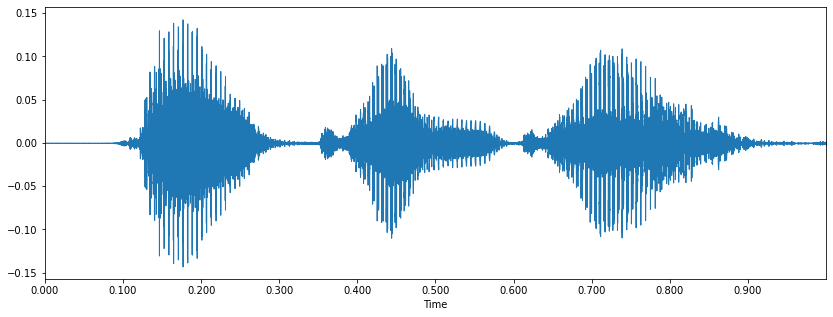

In [143]:
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sr)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


<class 'numpy.ndarray'>


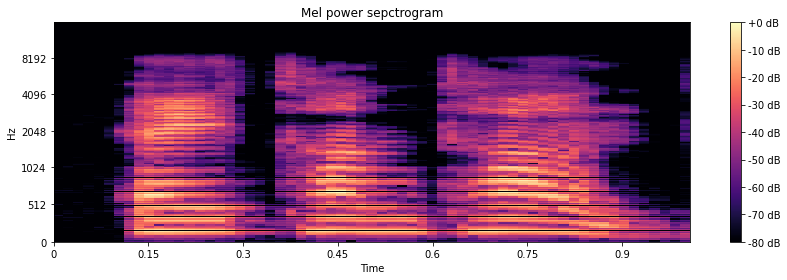

In [144]:
spectrogram = mel_spectrogram_process(signal, sr)
print(type(spectrogram))
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

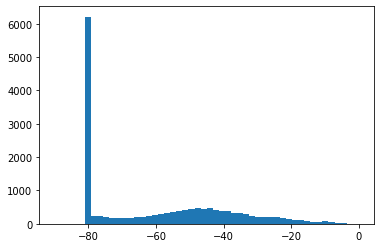

In [145]:
hist, bins = np.histogram(spectrogram, 50, [-90,0])
plt.hist(spectrogram.flatten(), 50, [-90,0])
plt.show()

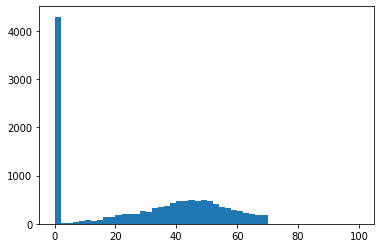

In [146]:
new_spectrogram = -spectrogram
cut_spectrogram = new_spectrogram[:][:-50]
zero_spectrogram = np.where( cut_spectrogram > 70 , 0, cut_spectrogram)

hist, bins = np.histogram(zero_spectrogram, 50, [0,100])
plt.hist(zero_spectrogram.flatten(), 50, [0,100])
plt.show()

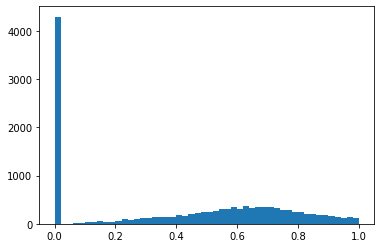

In [147]:
min_value = np.min(zero_spectrogram)
max_value = np.max(zero_spectrogram)

regul =  (zero_spectrogram - min_value) / (max_value - min_value)

hist, bins = np.histogram(regul, 50, [0,1])
plt.hist(regul.flatten(), 50, [0,1])
plt.show()

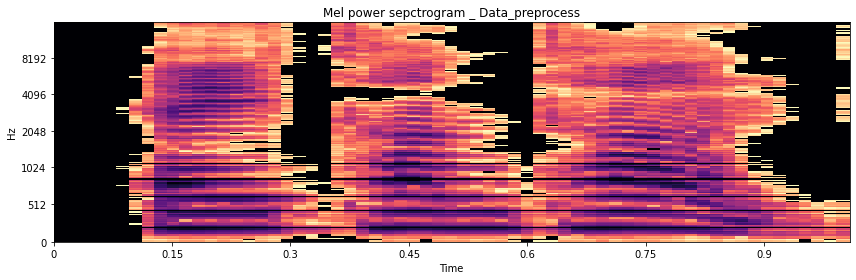

In [148]:
plt.figure(figsize=(12,4))
librosa.display.specshow(regul, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram _ Data_preprocess')
#plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Spectrogram 모양 비교

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


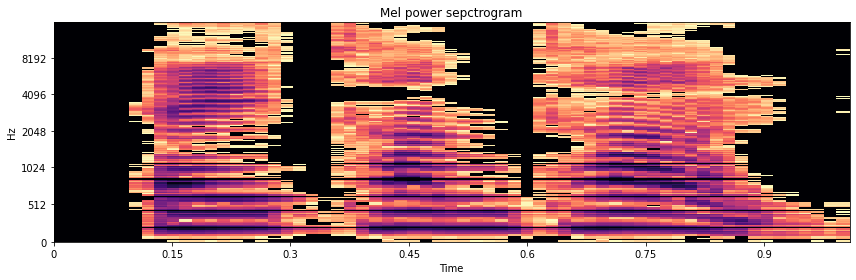

In [166]:
#data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/hi_yutan_stretch_sound0020.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


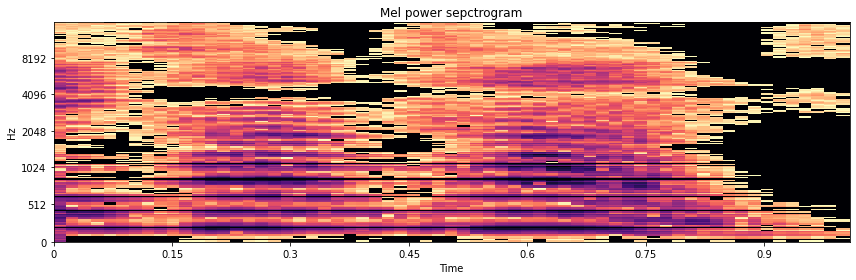

In [167]:
#data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/hi_yutan_stretch_sound0020.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/hey_tantan_stretch_sound0020.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


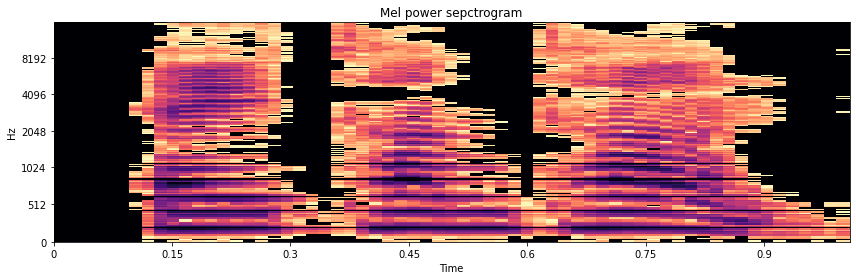

In [168]:
# data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/hi_yutan_reverse_data0020.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/hey_tantan_reverse_data0020.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


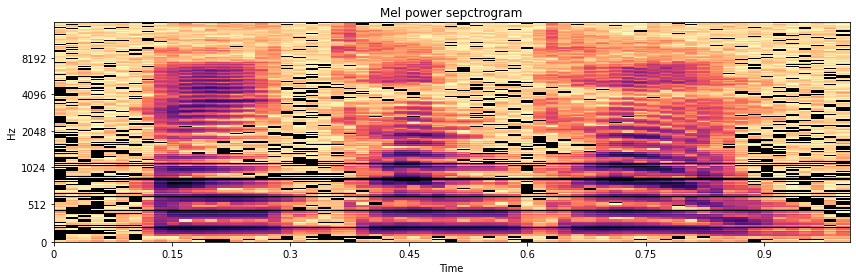

In [169]:
# data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/hi_yutan_white_noise0020.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/hey_tantan_white_noise0020.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# 소리 확인

In [153]:
import librosa.display

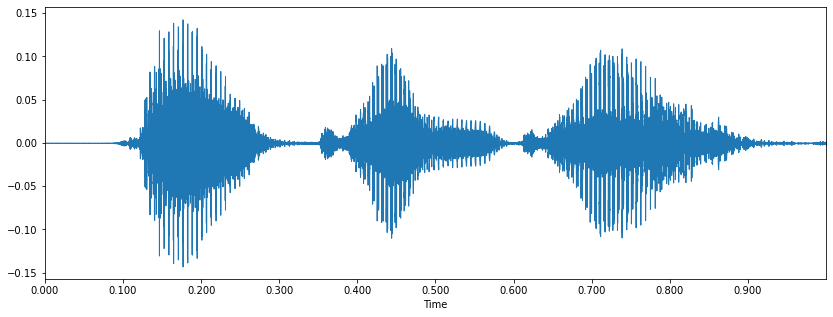

In [154]:
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sr)

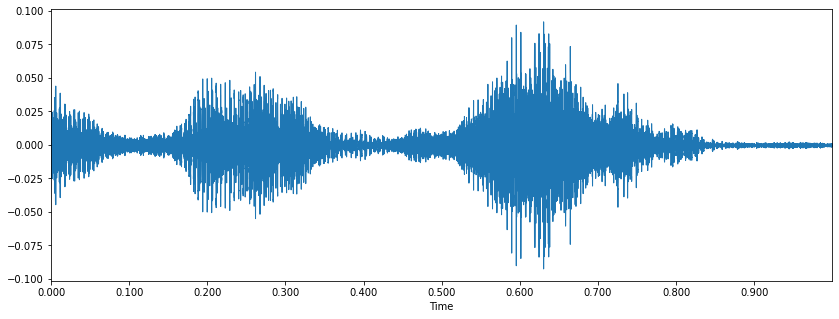

In [155]:
# data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/hi_yutan_reverse_data0020.wav"

data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/hey_tantan_stretch_sound0020.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sr)

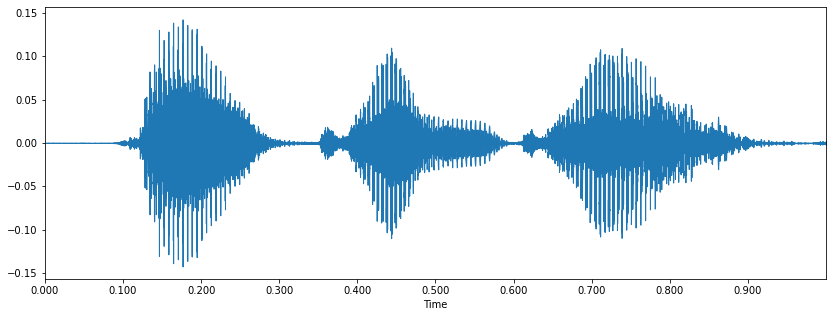

In [156]:
# data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/hi_yutan_stretch_sound0020.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/hey_tantan_reverse_data0020.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sr)

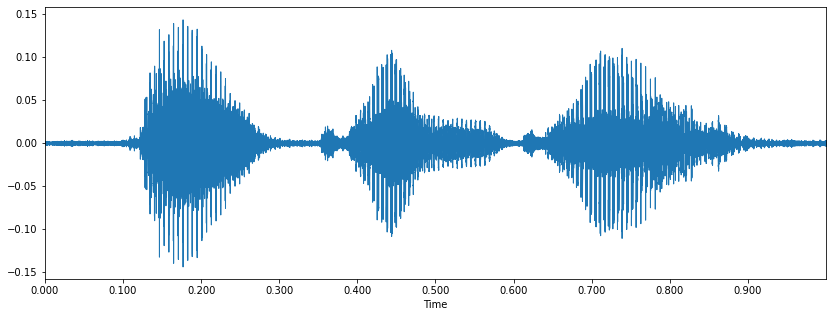

In [157]:
# data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/hi_yutan_white_noise0020.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/hey_tantan_white_noise0020.wav"

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sr)

# Pitch Augmetation 추가 할것
- 다른 것도 sample rate 변경 해주기
- noise 추가에 대해서는, noise 크기 키워가면서 데이터 더 추가

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


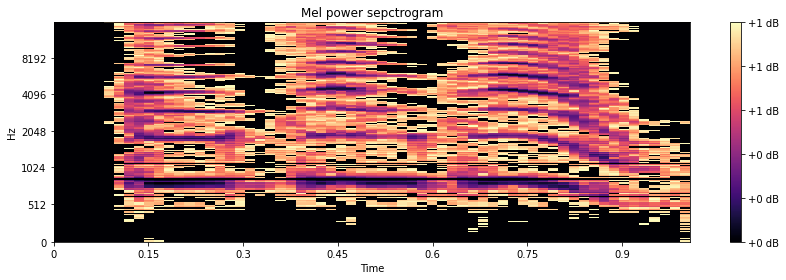

In [158]:
# 무작위로 음 높이 (pitch)를 수정 하기


def pitch_sound(data, sr, pitch_factor=24):   # end_path, count,
    sig, sr = librosa.load(data, sr=sample_rate)
    pitch_data = librosa.effects.pitch_shift(sig, sample_rate, pitch_factor)
    #sf.write( end_path, stretch_data, sr)
    return pitch_data

data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"

orig_signal = pitch_sound(data_path, sr)

signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()



/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


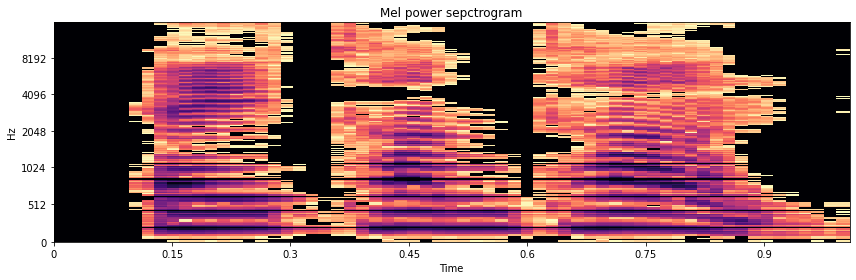

In [170]:
# 원본
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

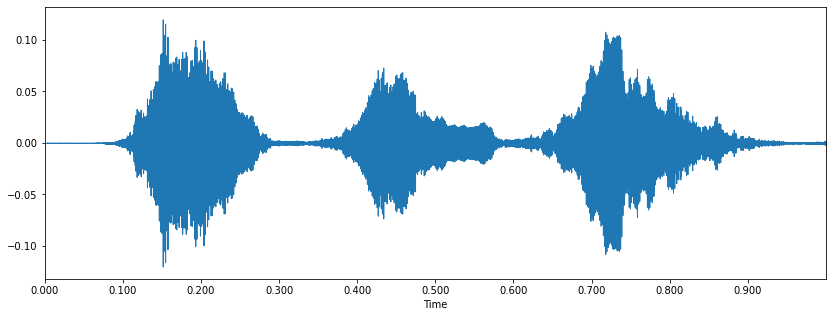

In [159]:
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sample_rate)

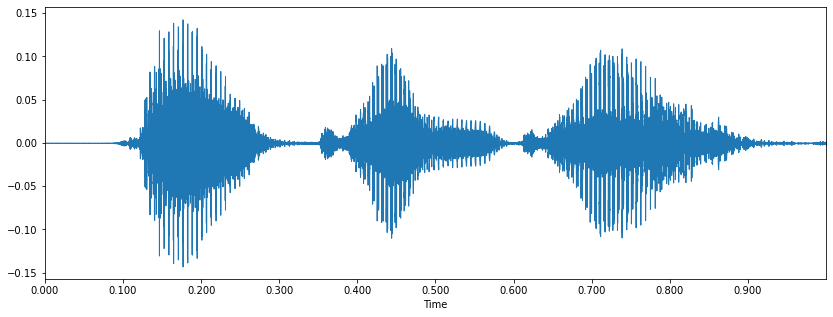

In [160]:
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sr)

# MFCC 결과 확인 하기

In [161]:
#data_path = "/content/drive/MyDrive/custum_dataset/hi_yutan/voice0020_hi_yutan.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"

signal, sr = librosa.core.load(data_path, sample_rate)
signal = signal[int(-cut - click): int(-click)]

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(13, 63)


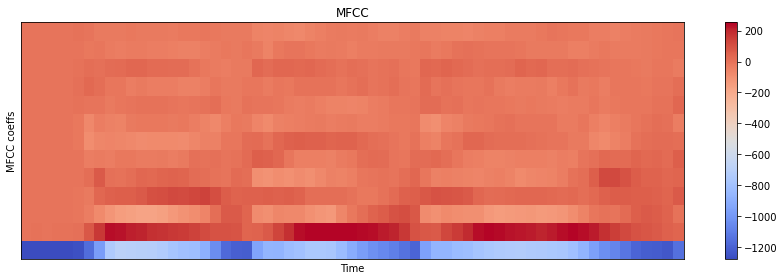

In [162]:
# log-mel Spectrogram 먼저 가져온 다음에
# spectogram = mel_spectrogram_process(signal, sr)
mfcc  = mfcc_process(signal, sr)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
print(mfcc.shape)

(13, 63)


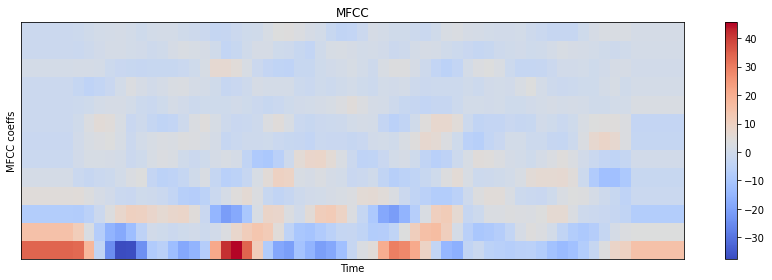

In [163]:
plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
print(mfcc.shape)

# 실시간 _ 저전력 모드 idea

In [164]:
n_fft=1024
hop_length=512
win_length=1024
sample_rate = 32000
wav_time = 1

n_mels=256
n_mfcc=13

sampel_cut  =   sample_rate*wav_time   #32000   # 38400

click = sample_rate * 0.2
stride_rate = 4
CHUNK = sampel_cut / stride_rate   # 8000

In [165]:
real_time = np.array([ [i,i] for i in range(10)])

real_time = np.array([ [1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1] ]  )

frame = [[1,1]]

for data in real_time:
  if np.mean(frame) <= 2:
    if np.array(frame).shape[0] == stride_rate:
      frame.pop(0)
      frame.append(data)
      result = frame[0]
      for i in range(1, stride_rate):
        result = np.concatenate( (result, frame[i]), axis = 0   )
    else:
      frame.append(data)
    print("저전력")
    continue

  if np.array(frame).shape[0] == stride_rate:
    frame.pop(0)
    frame.append(data)
    result = frame[0]
    for i in range(1, stride_rate):
      result = np.concatenate( (result, frame[i]), axis = 0   )
    print(result)
  else:
    frame.append(data)

  print(frame)


저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
[2 2 3 3 4 4 5 5]
[array([2, 2]), array([3, 3]), array([4, 4]), array([5, 5])]
[3 3 4 4 5 5 6 6]
[array([3, 3]), array([4, 4]), array([5, 5]), array([6, 6])]
[4 4 5 5 6 6 7 7]
[array([4, 4]), array([5, 5]), array([6, 6]), array([7, 7])]
[5 5 6 6 7 7 1 1]
[array([5, 5]), array([6, 6]), array([7, 7]), array([1, 1])]
[6 6 7 7 1 1 1 1]
[array([6, 6]), array([7, 7]), array([1, 1]), array([1, 1])]
[7 7 1 1 1 1 1 1]
[array([7, 7]), array([1, 1]), array([1, 1]), array([1, 1])]
[1 1 1 1 1 1 1 1]
[array([1, 1]), array([1, 1]), array([1, 1]), array([1, 1])]
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력


# 음성 합성 -- 검토 중

In [175]:
import os

/content/drive/MyDrive/_background_noise_


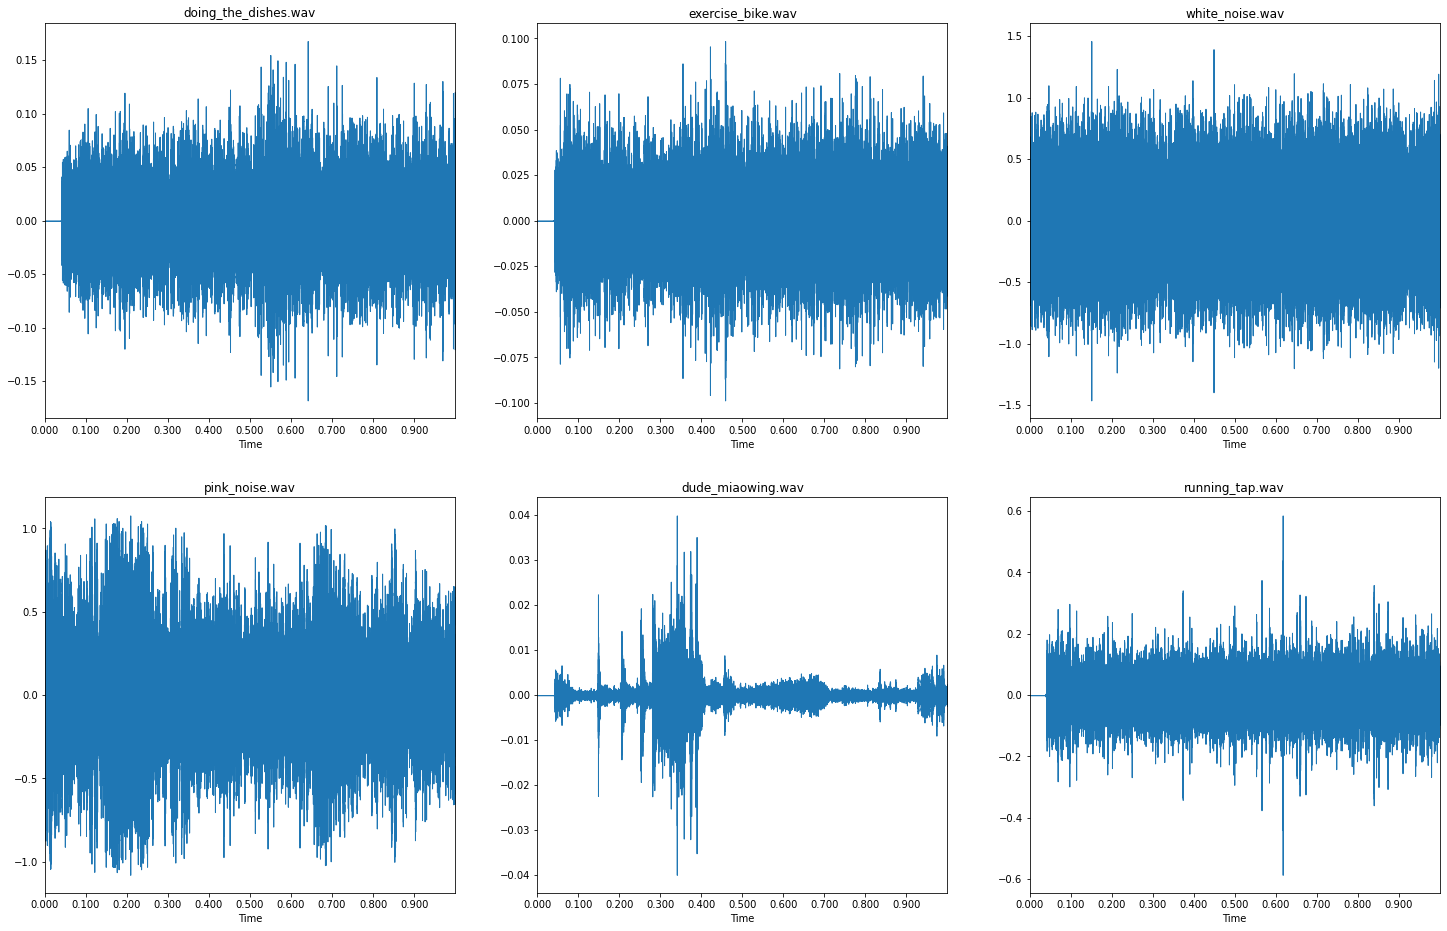

In [185]:
back_base_path = "/content/drive/MyDrive/_background_noise_"
back_ground_sound_list = os.listdir(back_base_path)
print(back_base_path)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 16))
for row in range(2):
  for col in range(3):
    idx = row*3 + col
    if idx < len(back_ground_sound_list):
      ax = axes[row][col]
      signal, sr = librosa.core.load(back_base_path + '/'+back_ground_sound_list[idx] , sample_rate)
      signal = signal[: 32000]
      ax.set_title(back_ground_sound_list[idx])
      librosa.display.waveplot(signal, sr=sr, ax = ax)



# signal, sr = librosa.core.load(data_path, sample_rate)
# # signal = orig_signal[int(-cut - click): int(-click)]
# fig = plt.figure(figsize = (14,5))
# plt.title("Doin_the_dishes")
# librosa.display.waveplot(signal, sr=sr)

# 새로운 모델 !!

In [264]:
from tensorflow.keras.layers import Dense,  Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization , LeakyReLU
from tensorflow.keras import Sequential

def detection_model_01(sample_shape):
    model = Sequential([
                        
        # conv layer 부분
        Conv2D(32, (3, 3), activation='relu', input_shape=sample_shape ),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(3, 3)),

        # FC layer 부분
        Flatten(),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(6, activation="softmax")
    ])

    return model

def detection_model_02(sample_shape):
    model = Sequential([
        # conv layer 부분
        Conv2D(32, (3, 3), activation= LeakyReLU(alpha=0.3), input_shape=sample_shape ),
        Conv2D(64, (3, 3), activation= LeakyReLU(alpha=0.3), padding="same"),
        MaxPooling2D(pool_size=(3, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(128, (3, 3), activation = LeakyReLU(alpha=0.3)),
        MaxPooling2D(pool_size=(3, 3)),

        # FC layer 부분
        Flatten(),
        Dense(64, activation = LeakyReLU(alpha=0.3)),
        Dropout(0.5),
        Dense(64, activation= LeakyReLU(alpha=0.3)),
        Dense(6, activation="softmax")
    ])
    return model




# 인식 전용 모델 

def recog_model_01(sample_shape):
    model = Sequential([
                        
        # conv layer 부분
        Conv2D(32, (3, 3), activation='relu', input_shape=sample_shape ),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(3, 3)),

        # FC layer 부분
        Flatten(),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(6, activation="softmax")
    ])

    return model

def recog_model_02(sample_shape):
    model = Sequential([
        # conv layer 부분
        Conv2D(32, (3, 3), activation= LeakyReLU(alpha=0.3), input_shape=sample_shape,),
        Conv2D(32,  (3, 3), activation= LeakyReLU(alpha=0.3)),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(64, (3, 3), activation = LeakyReLU(alpha=0.3), padding = 'same' ),
        Conv2D(64,  (3, 3), activation = LeakyReLU(alpha=0.3)),
        MaxPooling2D(pool_size=(3, 3)),
        BatchNormalization(),

        # FC layer 부분
        Flatten(),
        Dense(128, activation = LeakyReLU(alpha=0.3)),
        Dense(128, activation = LeakyReLU(alpha=0.3)),
        Dropout(0.5),
        Dense(64, activation= LeakyReLU(alpha=0.3)),
        Dense(6, activation="softmax")
    ])
    return model

def recog_model_03(sample_shape):
    model = Sequential([
        # conv layer 부분
        Conv2D(32, (4, 2), activation= LeakyReLU(alpha=0.3), input_shape=sample_shape,),
        Conv2D(32,  (4, 2), activation= LeakyReLU(alpha=0.3)),
        MaxPooling2D(pool_size=(4, 2)),
        Conv2D(64, (4, 2), activation = LeakyReLU(alpha=0.3), padding = 'same' ),
        Conv2D(64,  (4, 2), activation = LeakyReLU(alpha=0.3)),
        MaxPooling2D(pool_size=(4, 2)),
        Conv2D(64,  (4, 2), activation = LeakyReLU(alpha=0.3), padding = 'same' ),
        Conv2D(64,  (4, 2), activation = LeakyReLU(alpha=0.3)),
        MaxPooling2D(pool_size=(4, 2)),
        BatchNormalization(),

        # FC layer 부분
        Flatten(),
        Dense(128, activation = LeakyReLU(alpha=0.3)),
        Dense(128, activation = LeakyReLU(alpha=0.3)),
        Dropout(0.5),
        Dense(64, activation= LeakyReLU(alpha=0.3)),
        Dense(6, activation="softmax")
    ])
    return model

input_shape = (206 , 63, 1)

In [265]:
model = recog_model_02(input_shape)
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_134 (Conv2D)         (None, 204, 61, 32)       320       
                                                                 
 conv2d_135 (Conv2D)         (None, 202, 59, 32)       9248      
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 67, 19, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 67, 19, 64)        18496     
                                                                 
 conv2d_137 (Conv2D)         (None, 65, 17, 64)        36928     
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 21, 5, 64)        0         
 ng2D)                                               

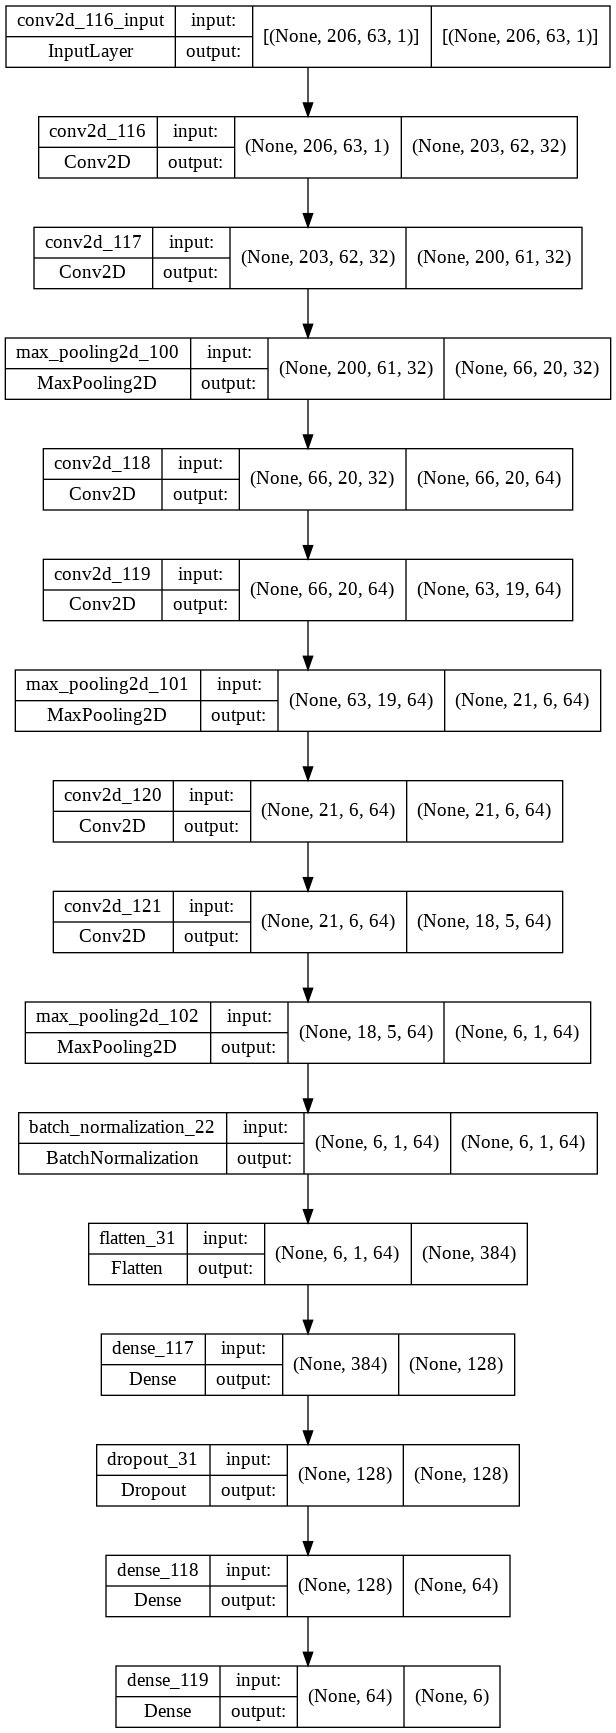

In [259]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)